In [66]:
import numpy as np
import matplotlib.pyplot as plt

# FBD Analysis

## Reaction Forces (lbf)

In [67]:
Cx = 22.6 # Wr
Cy = 11.3 # Wx
Cz = 69.5 # Wt
Dx = 99.1 # Wr
Dy = 49.6 # Wx
Dz = 304.6 # Wt

## Distances (inch)

In [68]:
AB = 1 
BC = 1
CD = 3
DE = 2
EF = 2
CC = 1.985 #R_mc
DD = 0.735 #R_md

## Force and Moment Equations

Assume axial load is entirely on bearing B

In [69]:
By = Cy - Dy #lbf
Ey = 0


$\Sigma F_x = 0 = -B_x + C_x + D_x -E_x$

$\Sigma F_z = 0 = -B_z + C_z + D_z -E_z$

Take moments about B

$\Sigma M_x = 0 = \vec{BC} \cdot C_z + \vec{BD} \cdot D_z +\vec{BE} \cdot E_z$

$\Sigma M_y = 0 = \vec{CC} \cdot C_z + \vec{DD} \cdot D_z + T_A - T_F$

$T_A = T_F$

$\Sigma M_z = 0 = \vec{BC} \cdot C_x + \vec{BD} \cdot D_x +\vec{BE} \cdot E_x$


In [70]:
BD = (BC+CD)
BE = (BC+CD+DE)

A = np.array([
    [ 1,   0,   1,   0,   0,   0],
    [ 0,   1,   0,   1,   0,   0],
    [ 0,   0,   0,  BE,   0,   0],
    [ 0,   0,   0,   0,   1,  -1],
    [ 0,   0,   0,   0,   1,   1],
    [ 0,   0,  BE,   0,   0,   0],     
], dtype=float)

b = np.array([
     (Cx + Dx),                       
     (Cz + Dz),                      
     (BC*Cz + BD*Dz),                  
    0,                                 
     (CC*Cz + DD*Dz),                   
     (BC*Cx + BD*Dx),                  
], dtype=float)

sol = np.linalg.solve(A, b)

Bx, Bz, Ex, Ez, TA, TF = sol

print("Bx =", Bx, "lbf")
print("Bz =", Bz, "lbf")
print("Ex =", Ex, "lbf")
print("Ez =", Ez, "lbf")
print("TA =", TA, "lbf-in")
print("TF =", TF, "lbf-in")

Bx = 51.86666666666666 lbf
Bz = 159.45000000000002 lbf
Ex = 69.83333333333333 lbf
Ez = 214.65 lbf
TA = 180.91925 lbf-in
TF = 180.91925 lbf-in


## Torques (lbf-in)

In [71]:
TB = 0
TC = CC * Cz
TD = DD * Dz
TE = 0

Torque_AB = -TA
Torque_BC = Torque_AB + TB
Torque_CD = Torque_BC + TC
Torque_DE = Torque_CD + TD
Torque_EF = Torque_DE + TE

Torque_AB, Torque_BC, Torque_CD, Torque_DE, Torque_EF

(np.float64(-180.91925),
 np.float64(-180.91925),
 np.float64(-42.961749999999995),
 np.float64(180.91925),
 np.float64(180.91925))

## Force, Shear, and Moments in x

diagram for force goes here

In [72]:
t_abx = 0 # shear
t_bcx = - Bx
t_cdx = t_bcx + Cx
t_dex = t_cdx + Dx
t_efx = t_dex - Ex

#t_abx, t_bcx, t_cdx, t_dex, t_efx

shear diagram here

In [73]:
T_ax = 0 # moments

T_bx = T_ax + t_abx * AB 

T_cx = T_bx + t_bcx * BC

T_dx = T_cx + t_cdx * CD

T_ex = T_dx + t_dex * DE

T_fx = T_ex + t_efx * EF

#T_ax, T_bx, T_cx, T_dx, T_ex, T_fx

moment diagram here

## Force, Shear, and Moments in z 

diagram for force here

In [74]:
t_abz = 0 # shear
t_bcz = - Bz
t_cdz = t_bcz + Cz
t_dez = t_cdz + Dz
t_efz = t_dez - Ez

#t_abz, t_bcz, t_cdz, t_dez, t_efz

shear diagram

In [75]:
T_az = 0 # moments
T_bz = T_az + t_abz * AB 
T_cz = T_bz + t_bcz * BC
T_dz = T_cz + t_cdz * CD
T_ez = T_dz + t_dez * DE
T_fz = T_ez + t_efz * EF

#T_ay, T_by, T_cy, T_dy, T_ey, T_fy

moment diagram

## Resultant Shear and Moments

In [76]:
V_ab = np.linalg.norm(np.array([t_abx, t_abz]))
V_bc = np.linalg.norm(np.array([t_bcx, t_bcz]))
V_cd = np.linalg.norm(np.array([t_cdx, t_cdz]))
V_de = np.linalg.norm(np.array([t_dex, t_dez]))
V_ef = np.linalg.norm(np.array([t_efx, t_efz]))

V_ab, V_bc, V_cd, V_de, V_ef

(np.float64(0.0),
 np.float64(167.67365210763174),
 np.float64(94.59143871290773),
 np.float64(225.72398398142022),
 np.float64(1.4210854715202004e-14))

In [77]:
M_a = np.linalg.norm(np.array([T_ax, T_az]))
M_b = np.linalg.norm(np.array([T_bx, T_bz]))
M_c = np.linalg.norm(np.array([t_bcx, t_bcz]))
M_d = np.linalg.norm(np.array([t_cdx, t_cdz]))
M_e = np.linalg.norm(np.array([t_dex, t_dez]))
M_f = np.linalg.norm(np.array([t_efx, t_efz]))

M_a, M_b, M_c, M_d, M_e, M_f

(np.float64(0.0),
 np.float64(0.0),
 np.float64(167.67365210763174),
 np.float64(94.59143871290773),
 np.float64(225.72398398142022),
 np.float64(1.4210854715202004e-14))

## Shaft Diameter Determination

The shaft will be made of a martensitic steel due to the marine application. We select SAE 416 Q&T 1400 from table A-6 in Mott; 

$S_u = 90 \text{ ksi}\\$

$S_y = 60 \text{ ksi}\\$

$S_n = 35 \text{ ksi}$, assuming machined/cold drawn, F-5 Mott

Assume wrought steel; $C_m = 1$

Only working with bending stress; $C_{st} = 1$

Assume 99% reliability; $C_R = 0.81$

Will guess 2" shaft; $C_s = 0.8$

All elements are held by retaining rings from both sides; $K_t = 3$

Assume a saftey factor; $N = 3$

Assume torque/moments dominate;

$D = \left(\frac{32N}{\pi} \sqrt{\left( \frac{K_t M}{S_n'}\right)^2  + \frac{3}{4}\left(\frac{T}{S_y} \right)^2}\right)^{\frac{1}{3}}$

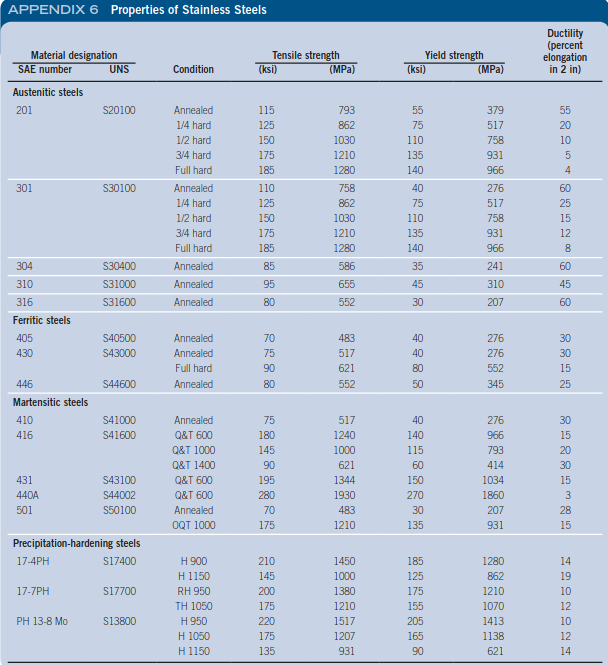
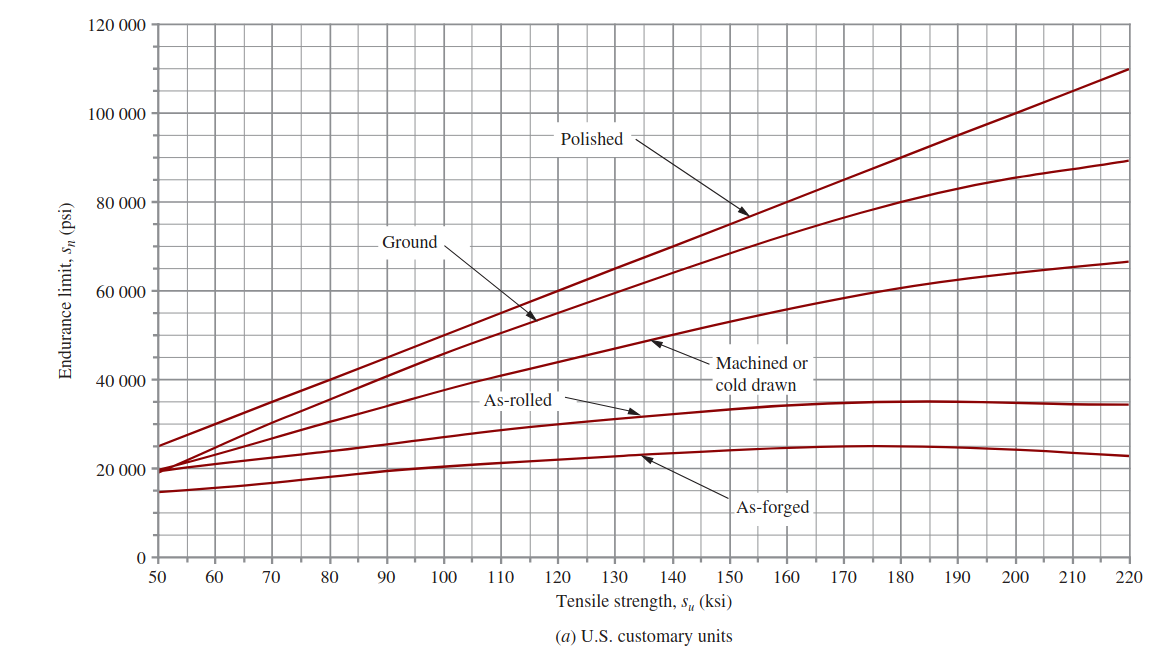

In [78]:
Su = 87 * 10**3
Sy = 60 * 10**3
Sn = 33 * 10**3
Cm = 1
Cst = 1
Cr = 0.81
Cs = 0.8
Kt = 3
N=3
Sn_p = Sn * Cm * Cst * Cr * Cs

In [79]:
def shaft_diameter(M, T):
    term1 = (Kt * M) / Sn_p
    term2 = (T / Sy)
    
    inside_sqrt = term1**2 + 0.75 * term2**2
    inside_cubic = (32 * N / np.pi) * np.sqrt(inside_sqrt)
    
    D = inside_cubic ** (1/3)
    return D

D_ab1 = shaft_diameter(M_a, Torque_AB)
D_ab2 = shaft_diameter(M_b, Torque_AB)
D_ab = max(D_ab1, D_ab2)

D_bc1 = shaft_diameter(M_b, Torque_BC)
D_bc2 = shaft_diameter(M_c, Torque_BC)
D_bc = max(D_bc1, D_bc2)

D_cd1 = shaft_diameter(M_c, Torque_CD)
D_cd2 = shaft_diameter(M_d, Torque_CD)
D_cd = max(D_cd1, D_cd2)

D_de1 = shaft_diameter(M_d, Torque_DE)
D_de2 = shaft_diameter(M_e, Torque_DE)
D_de = max(D_de1, D_de2)

D_ef1 = shaft_diameter(M_f, Torque_EF)
D_ef2 = shaft_diameter(M_f, Torque_EF)
D_ef = max(D_ef1, D_ef2)

D = max(D_ab, D_bc, D_cd, D_de, D_ef)
D * 1.06

np.float64(1.0496395614116638)

In [80]:
Cs = 0.9
Sn_p = Sn * Cm * Cst * Cr * Cs
D_ab1 = shaft_diameter(M_a, Torque_AB)
D_ab2 = shaft_diameter(M_b, Torque_AB)
D_ab = max(D_ab1, D_ab2)

D_bc1 = shaft_diameter(M_b, Torque_BC)
D_bc2 = shaft_diameter(M_c, Torque_BC)
D_bc = max(D_bc1, D_bc2)

D_cd1 = shaft_diameter(M_c, Torque_CD)
D_cd2 = shaft_diameter(M_d, Torque_CD)
D_cd = max(D_cd1, D_cd2)

D_de1 = shaft_diameter(M_d, Torque_DE)
D_de2 = shaft_diameter(M_e, Torque_DE)
D_de = max(D_de1, D_de2)

D_ef1 = shaft_diameter(M_f, Torque_EF)
D_ef2 = shaft_diameter(M_f, Torque_EF)
D_ef = max(D_ef1, D_ef2)

D = max(D_ab, D_bc, D_cd, D_de, D_ef)
D = D * 1.06
D


np.float64(1.0095296795550357)

## Keys

Both gears are bound to shaft with keys. We select a 0.25" square key shaft from table 11-1 in Mott since nominal shaft diameter falls between; 0.875" - 1.25". We select the keys to be made of SAE 1018; $S_y = 54 \text{ ksi}$ from table 11-4 of Mott.

In [81]:
D = 1.0
T_max = max(Torque_AB, Torque_BC, Torque_CD, Torque_DE, Torque_EF)
Sy_key = 54000
W = 0.25

L_min = (4 * T_max * N) / (D * W * Sy_key)


1/16" is more than acceptable, but for ease of manufacturing we select; L = 1/8"

## Bearings

Since we have a thrust load at B we use a thrust bearing at B. And we will use a deep groove ball bearing at E.

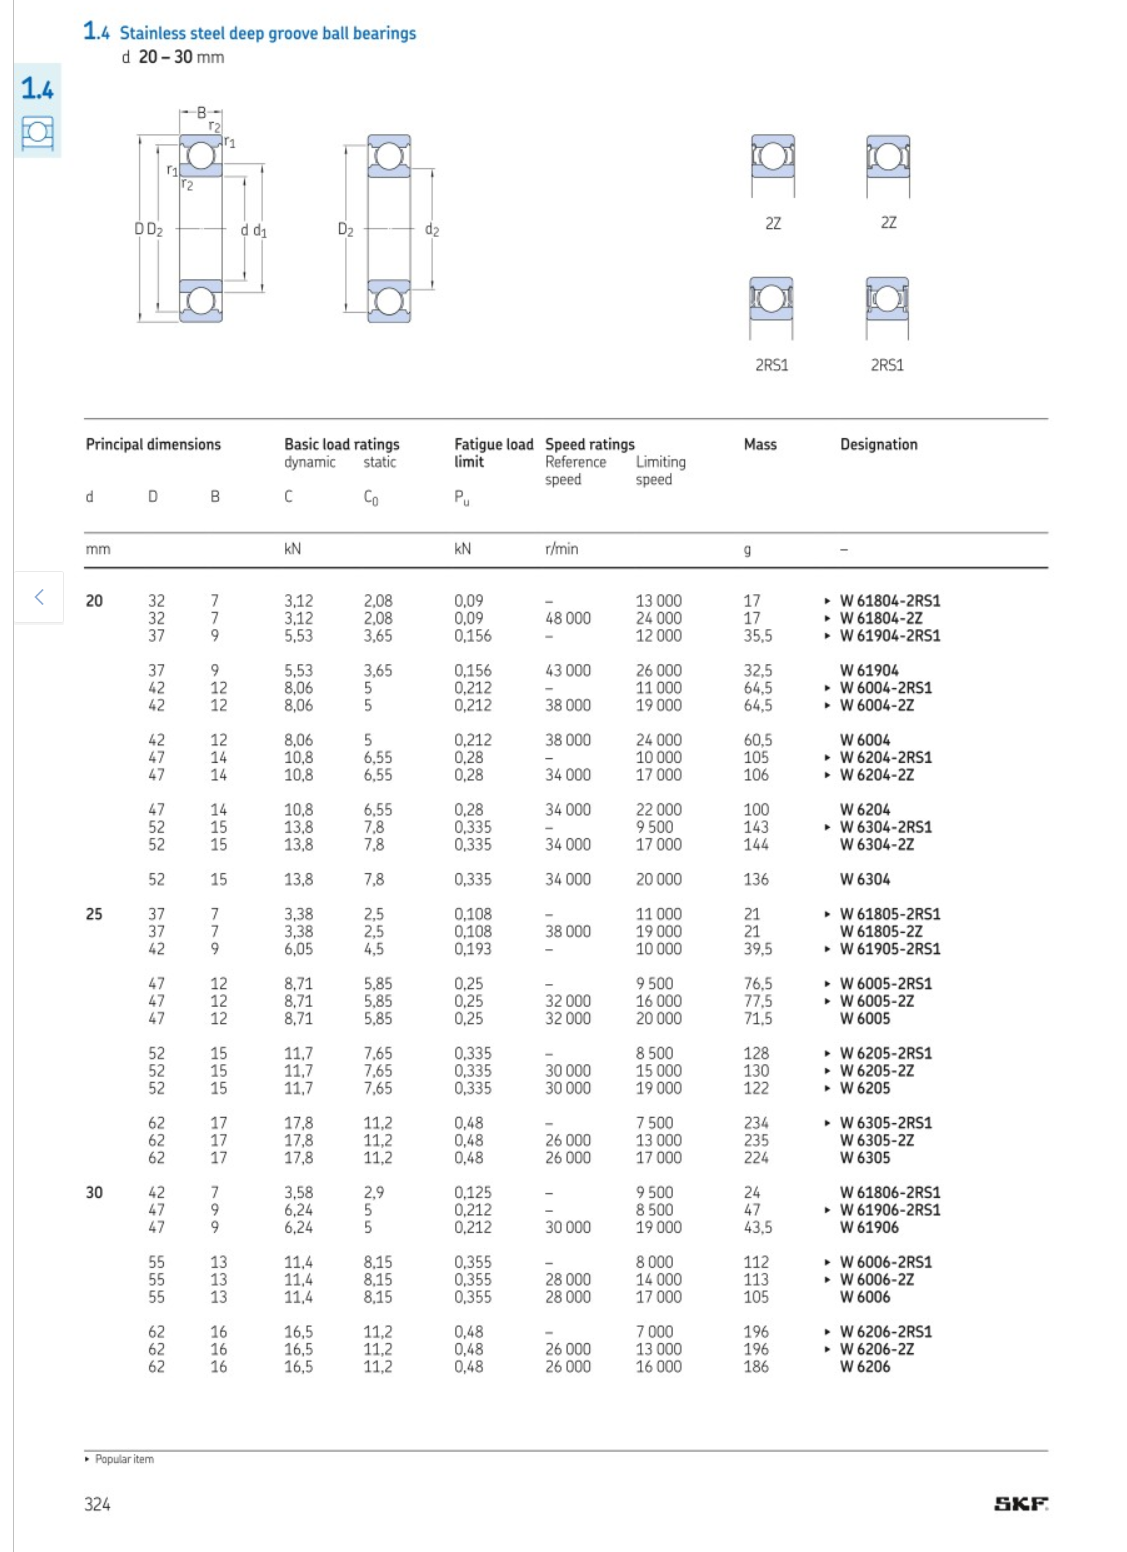

### Thrust Bearing and Housing

### Deep Groove Bearing and Housing